In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [3]:

####################################################################################################
####################################################################################################

#nEventsTrain, resample_factor = 10000, 2290
#nEventsTrain, resample_factor = 10000, 229
#nEventsTrain, resample_factor = 25000, 229
nEventsTrain, resample_factor = 25000, 229

#file_pred = "./predictions/xy_s2waveforms_events%06d_resample%04d.pkl" % (nEventsTrain, resample_factor) 
#file_pred = "./predictions/xy_s2waveforms_test_timesteps0010.pkl"

file_pred = "./predictions/"

#file_pred += 'model_model_xy_s2waveforms_dnn_elu_acc9902_epochs10_layers-1270-1270-127-2'
file_pred += 'dnn_xy_s2waveforms_elu_acc9915_epochs10_layers-1270-1270-127-2'

file_pred += '.pkl'


df_xy    = pd.read_pickle(file_pred)

display(df_xy[0:5][:])
print()


####################################################################################################
####################################################################################################

arr_r_true       = df_xy[:]['x_true'].as_matrix()
arr_r_pred       = df_xy[:]['x_pred'].as_matrix()
#arr_r_tpf        = df_xy[:]['intr_x'].as_matrix()
#arr_r_nn         = df_xy[:]['intr_x_nn'].as_matrix()

arr_dr_true_pred = arr_r_true - arr_r_pred
#arr_dr_true_nn   = arr_r_true - arr_r_nn
#arr_dr_true_tpf  = arr_r_true - arr_r_tpf



,x_pred,y_pred,x_true,y_true
0,10.528956,-5.394522,11.452923,-4.799238
1,17.457815,-14.849562,19.004622,-14.180182
2,-0.398164,-30.419701,-0.713852,-30.766731
3,-30.271709,-17.710238,-31.193504,-19.178736
4,14.097367,-12.268551,15.701762,-12.451200


In [4]:

####################################################################################################
####################################################################################################

r_min     = -45
r_max     =  45
r_nbins   = 90

dr_nbins = 12*10
dr_range = [-6, 6]
dr_max   = 5

eps   = .001

r_mean_true  = np.mean(arr_r_true)
#r_mean_tpf   = np.mean(arr_r_tpf )
#r_mean_nn    = np.mean(arr_r_nn  )
r_mean_pred  = np.mean(arr_r_pred)

r_std_true   = np.std(arr_r_true)
#r_std_tpf    = np.std(arr_r_tpf )
#r_std_nn     = np.std(arr_r_nn  )
r_std_pred   = np.std(arr_r_pred)

#dr_mean_true_nn   = np.mean(arr_dr_true_nn)
dr_mean_true_pred = np.mean(arr_dr_true_pred)
#dr_mean_true_tpf  = np.mean(arr_dr_true_tpf)

#dr_std_true_nn    = np.std (arr_dr_true_nn)
dr_std_true_pred  = np.std (arr_dr_true_pred)
#dr_std_true_tpf   = np.std (arr_dr_true_tpf)


label_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', r_std_true, r_mean_true )
##label_tpf  = '%5s (std: %.02f, mean: %.02f)' % ( 'TPF ', r_std_tpf , r_mean_tpf  )
#label_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'XeNN', r_std_nn  , r_mean_nn   )
label_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', r_std_pred, r_mean_pred )

dr_label_true_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(true, pred)'      , dr_std_true_pred, dr_mean_true_pred )
#dr_label_true_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(true, NN (Xe1T) )', dr_std_true_nn  , dr_mean_true_nn   )
#dr_label_true_tpf  = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(true, TPF)'       , dr_std_true_tpf , dr_mean_true_tpf  )



####################################################################################################
# Overflow & Underflow
####################################################################################################

arr_dr_true_pred = np.clip(arr_dr_true_pred, -dr_max, dr_max)
#arr_dr_true_nn   = np.clip(arr_dr_true_nn  , -dr_max, dr_max)
#arr_dr_true_tpf  = np.clip(arr_dr_true_tpf , -dr_max, dr_max)



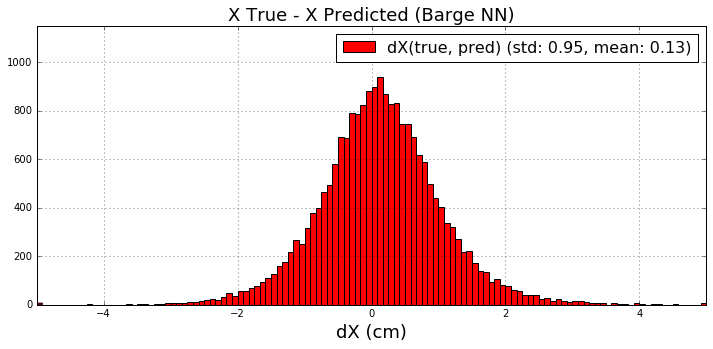

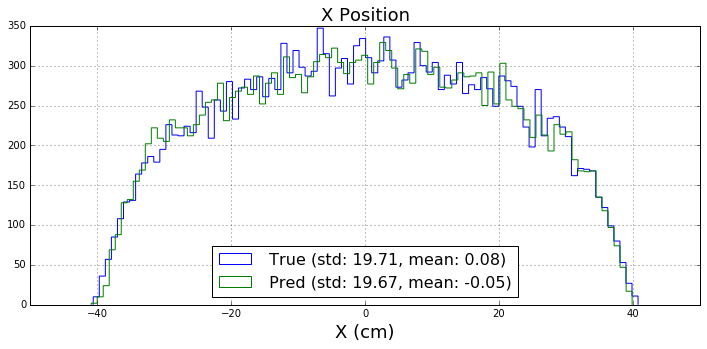

In [5]:

w, h = 12, 5

####################################################################################################
# Resolution - Prediction
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_pred, bins=dr_nbins, histtype='bar', color='r', label=dr_label_true_pred)
plt.xlim([-dr_max, dr_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X Predicted (Barge NN)', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

#plt.savefig('plots/x_resolution_barge.png')




####################################################################################################
# Position
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_r_true, bins=r_nbins, fill=False, histtype='step', label=label_true)
plt.hist(arr_r_pred, bins=r_nbins, fill=False, histtype='step', label=label_pred)
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)

#plt.savefig('plots/xy_position.png')
